# IMAGE CLASSIFICATION USING CNN(CONVOLUTIONAL NEURAL NETWORK)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

2025-06-02 03:03:21.676900: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 03:03:21.677251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 03:03:21.679441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 03:03:21.684823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748813601.694672  642545 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748813601.69

In [28]:
tf.config.experimental.list_physical_devices()

2025-06-02 03:24:46.005543: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
tf.__version__

'2.19.0'

In [27]:
tf.test.is_built_with_cuda()

True

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
Y_train.shape

(50000, 1)

In [11]:
Y_train[0]

array([6], dtype=uint8)

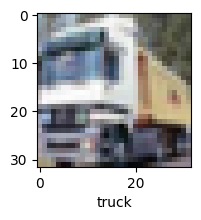

In [22]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_sample(x, y, index):
    plt.figure(figsize=(3, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[int(y[index])])
    plt.show()
plot_sample(X_train, Y_train, 1)

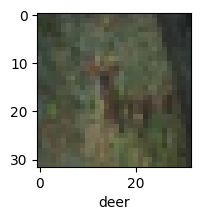

In [25]:
plot_sample(X_train, Y_train, 10)

# Normalization

In [29]:
X_train = X_train/255.0
Y_train = Y_train/255.0

In [34]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [36]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [37]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0998 - loss: 0.0367
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1019 - loss: 2.3399e-09
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1001 - loss: 4.2651e-09
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0995 - loss: 3.0488e-09
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1014 - loss: 8.9057e-10
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1008 - loss: 4.9912e-09
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0995 - loss: 8.1198e-10
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1025 - loss: 1.5917e-09
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.0976 - loss: 1.6840e-10
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.0988 - loss: 4.9263e-10


In [38]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1001 - loss: 18578.1797


[18496.142578125, 0.10000000149011612]

In [40]:
y_predict = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
